# Data exercise: credits consumed

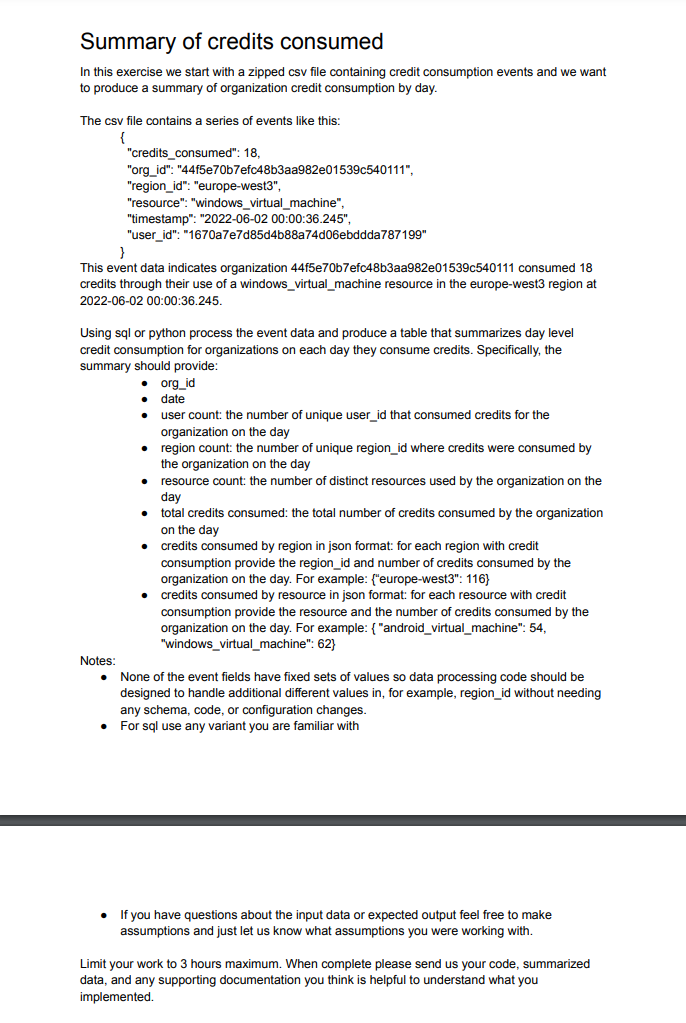

## Data Import and Transform into Dataframe

In [ ]:
### Import libraries
import pandas as pd
from datetime import datetime
import ast

### Import Dataset
df = pd.read_csv('credits_consumed.csv')

### Converting input JSON into dataframe
df = pd.DataFrame(df['RECORD_CONTENT'].apply(ast.literal_eval).values.tolist())

### change timestamp values into datetime format
df['timestamp'] =pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['Date'] = df['timestamp'].dt.date

df.head()

,credits_consumed,org_id,region_id,resource,timestamp,user_id,Date
0,24,51c17bc6c5d74d71a6f70619f4fa997f11,europe-west3,linux_virtual_machine,2022-06-02 00:00:05.997,630953893c5c48cea9c6e967b834e76199,2022-06-02
1,18,d4ec015aca20427e945cae852835d40411,europe-west3,windows_virtual_machine,2022-06-02 00:00:25.077,0a95db3fd35547dd96c8a8e1eff928db99,2022-06-02
2,16,1a041c6e6cd2427c8c20c82a091e988211,europe-west3,linux_virtual_machine,2022-06-02 00:00:26.209,ad55c7fbda264e358a737f84a15488f499,2022-06-02
3,22,1b1e798cdcf64f8887620884390e21a111,europe-west3,mac_virtual_machine,2022-06-02 00:00:36.203,32e78ed871ef4b088553bce77e2bad9f99,2022-06-02
4,8,7df751e4c88448bbbe4e60aa87acc50b11,europe-west3,windows_virtual_machine,2022-06-02 00:00:36.208,e48a24d386c34855a592339b6207175099,2022-06-02


In [ ]:
# !pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

In [ ]:
''' Generating summary of source data'''
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file('Input_dataset_summary.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Calculate user count, region count, resource count, total credits consumed

In [ ]:
df1 = df.groupby(['org_id', 'Date']).agg(                         # create temporary table #table1 as
             region_id_cnt = ('region_id', pd.Series.nunique),    # select count(distinct region_id) as region_id_cnt, 
             resource_cnt = ('resource', pd.Series.nunique),      # count(distinct resource) as resource_cnt, 
             user_id_cnt = ('user_id', pd.Series.nunique),        # count(distinct user_id) as user_id_cnt, 
             credits_consumed_sum = ('credits_consumed', 'sum'),  # org_id, timestamp::date as Date,
             )                                                    # sum(credits_consumed) as credits_consumed_sum
                                                                  # from credit_sonsumption  group by org_id, Date;
df1.head(20)

region_id_cnt  resource_cnt  \
org_id                             Date                                      
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02              1             1   
                                   2022-06-03              1             1   
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02              1             1   
                                   2022-06-03              1             1   
1b1e798cdcf64f8887620884390e21a1   2022-06-02              1             2   
                                   2022-06-03              1             2   
1b1e798cdcf64f8887620884390e21a111 2022-06-02              1             2   
                                   2022-06-03              1             2   
24fa9cc4e406459d9d35523f4af824a5   2022-06-02              1             1   
24fa9cc4e406459d9d35523f4af824a511 2022-06-02              1             1   
27792baaf604485dad5e677d1f99fb42   2022-06-03              1             1   
27792baaf604485dad5e677d1f99fb4211 2022-06-03              1             1   
3701320bb1294d37ac1320abb57b27ca   2022-06-02              1             1   
3701320bb1294d37ac1320abb57b27ca11 2022-06-02              1             1   
421ab9aeef2244cea704bf676248af01   2022-06-02              1             1   
                                   2022-06-03              1             1   
421ab9aeef2244cea704bf676248af0111 2022-06-02              1             1   
                                   2022-06-03              1             1   
44f5e70b7efc48b3aa982e01539c5401   2022-06-02              1             2   
                                   2022-06-03              1             2   

                                               user_id_cnt  \
org_id                             Date                      
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02            1   
                                   2022-06-03            1   
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02            1   
                                   2022-06-03            1   
1b1e798cdcf64f8887620884390e21a1   2022-06-02            1   
                                   2022-06-03            1   
1b1e798cdcf64f8887620884390e21a111 2022-06-02            1   
                                   2022-06-03            1   
24fa9cc4e406459d9d35523f4af824a5   2022-06-02            1   
24fa9cc4e406459d9d35523f4af824a511 2022-06-02            1   
27792baaf604485dad5e677d1f99fb42   2022-06-03            1   
27792baaf604485dad5e677d1f99fb4211 2022-06-03            1   
3701320bb1294d37ac1320abb57b27ca   2022-06-02            1   
3701320bb1294d37ac1320abb57b27ca11 2022-06-02            1   
421ab9aeef2244cea704bf676248af01   2022-06-02            1   
                                   2022-06-03            1   
421ab9aeef2244cea704bf676248af0111 2022-06-02            1   
                                   2022-06-03            1   
44f5e70b7efc48b3aa982e01539c5401   2022-06-02            1   
                                   2022-06-03            1   

                                               credits_consumed_sum  
org_id                             Date                              
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02                  2920  
                                   2022-06-03                  2096  
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02                  2920  
                                   2022-06-03                  2096  
1b1e798cdcf64f8887620884390e21a1   2022-06-02                 26230  
                                   2022-06-03                 25880  
1b1e798cdcf64f8887620884390e21a111 2022-06-02                 26230  
                                   2022-06-03                 25880  
24fa9cc4e406459d9d35523f4af824a5   2022-06-02                    18  
24fa9cc4e406459d9d35523f4af824a511 2022-06-02                    18  
27792baaf604485dad5e677d1f99fb42   2022-06-03                   118  
27792baaf604485dad5e677d1f99fb4211 2022-06-03          

## Generate credits consumed by resource in json format

In [ ]:
df2 = df.groupby(['org_id', 'Date','resource'])['credits_consumed'].agg(total ='sum') # create temporary table #table2 as
df2 = df2.reset_index()                                                               # select org_id, Date, resource,
                                                                                      # SUM(credits_consumed) as total from #table1 
df2.head(10)                                                                          # group by orig_id, Date, resource;

df2 = pd.DataFrame(df2.groupby(['org_id', 'Date'])[['resource','total']].apply(lambda g: dict(g.values)),columns = ['resource_cnt']) 
df2  # combining column "resource" and "total" from #table2 to form a json field ->  resource_cnt  = {'resource' : 'total'}

resource_cnt
org_id                             Date                                                         
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02                    {'linux_virtual_machine': 2920}
                                   2022-06-03                    {'linux_virtual_machine': 2096}
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02                    {'linux_virtual_machine': 2920}
                                   2022-06-03                    {'linux_virtual_machine': 2096}
1b1e798cdcf64f8887620884390e21a1   2022-06-02  {'mac_virtual_machine': 13674, 'windows_virtua...
...                                                                                          ...
feaf82e0e5e44c76bf87e0d74b210de811 2022-06-03  {'android_virtual_machine': 11484, 'windows_vi...
fee1b85694b7468fa524fb417929b576   2022-06-02                 {'windows_virtual_machine': 18128}
                                   2022-06-03                  {'windows_virtual_machine': 8982}
fee1b85694b7468fa524fb417929b57611 2022-06-02                 {'windows_virtual_machine': 18128}
                                   2022-06-03                  {'windows_virtual_machine': 8982}

[88 rows x 1 columns]

## Generate credits consumed by region in json format

In [ ]:
df3 = df.groupby(['org_id', 'Date','region_id'])['credits_consumed'].agg(total ='sum') # create temporary table #table3 as
df3 = df3.reset_index()                                                               # select org_id, Date, resource,
                                                                                      # SUM(credits_consumed) as total from #table1 
df3.head(10)                                                                          # group by orig_id, Date, resource;

df3 = pd.DataFrame(df3.groupby(['org_id', 'Date'])[['region_id','total']].apply(lambda g: dict(g.values)),columns = ['region_cnt'])
df3  # combining column "region_id" and "total" from #table3 to form a json field ->  resource_cnt  = {'resource' : 'total'}

region_cnt
org_id                             Date                               
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02       {'us-west4': 2920}
                                   2022-06-03       {'us-west4': 2096}
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02   {'europe-west3': 2920}
                                   2022-06-03   {'europe-west3': 2096}
1b1e798cdcf64f8887620884390e21a1   2022-06-02      {'us-west4': 26230}
...                                                                ...
feaf82e0e5e44c76bf87e0d74b210de811 2022-06-03  {'europe-west3': 21258}
fee1b85694b7468fa524fb417929b576   2022-06-02      {'us-west4': 18128}
                                   2022-06-03       {'us-west4': 8982}
fee1b85694b7468fa524fb417929b57611 2022-06-02  {'europe-west3': 18128}
                                   2022-06-03   {'europe-west3': 8982}

[88 rows x 1 columns]

## Merge the engineered dataset into result data

In [ ]:
df_res = pd.merge(df1,df2,on =['org_id',	'Date'],how='left')  # #table1 left join #table2  left join #table3
df_res = pd.merge(df_res,df3,on =['org_id',	'Date'],how='left')  
df_res

region_id_cnt  resource_cnt_x  \
org_id                             Date                                        
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02              1               1   
                                   2022-06-03              1               1   
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02              1               1   
                                   2022-06-03              1               1   
1b1e798cdcf64f8887620884390e21a1   2022-06-02              1               2   
...                                                      ...             ...   
feaf82e0e5e44c76bf87e0d74b210de811 2022-06-03              1               2   
fee1b85694b7468fa524fb417929b576   2022-06-02              1               1   
                                   2022-06-03              1               1   
fee1b85694b7468fa524fb417929b57611 2022-06-02              1               1   
                                   2022-06-03              1               1   

                                               user_id_cnt  \
org_id                             Date                      
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02            1   
                                   2022-06-03            1   
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02            1   
                                   2022-06-03            1   
1b1e798cdcf64f8887620884390e21a1   2022-06-02            1   
...                                                    ...   
feaf82e0e5e44c76bf87e0d74b210de811 2022-06-03            1   
fee1b85694b7468fa524fb417929b576   2022-06-02            1   
                                   2022-06-03            1   
fee1b85694b7468fa524fb417929b57611 2022-06-02            1   
                                   2022-06-03            1   

                                               credits_consumed_sum  \
org_id                             Date                               
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02                  2920   
                                   2022-06-03                  2096   
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02                  2920   
                                   2022-06-03                  2096   
1b1e798cdcf64f8887620884390e21a1   2022-06-02                 26230   
...                                                             ...   
feaf82e0e5e44c76bf87e0d74b210de811 2022-06-03                 21258   
fee1b85694b7468fa524fb417929b576   2022-06-02                 18128   
                                   2022-06-03                  8982   
fee1b85694b7468fa524fb417929b57611 2022-06-02                 18128   
                                   2022-06-03                  8982   

                                                                                  resource_cnt_y  \
org_id                             Date                                                            
1a041c6e6cd2427c8c20c82a091e9882   2022-06-02                    {'linux_virtual_machine': 2920}   
                                   2022-06-03                    {'linux_virtual_machine': 2096}   
1a041c6e6cd2427c8c20c82a091e988211 2022-06-02                    {'linux_virtual_machine': 2920}   
                                   2022-06-03                    {'linux_virtual_machine': 2096}   
1b1e798cdcf64f8887620884390e21a1   2022-06-02  {'mac_virtual_machine': 13674, 'windows_virtua...   
...                                                                                          ...   
feaf82e0e5e44c76bf87e0d74b210de811 2022-06-03  {'android_virtual_machine': 11484, 'windows_vi...   
fee1b85694b7468fa524fb417929b576   2022-06-02                 {'windows_virtual_machine': 18128}   
                                   2022-06-03                  {'windows_virtual_machine': 8982}   
fee1b85694b7468fa524fb417929b57611 2022-06-02                 {'windows_virtual_machine': 18128}   
                                   2022-06-03                  {'windows_vi

In [ ]:
''' Generating summary of result data'''
from pandas_profiling import ProfileReport
profile = ProfileReport(df_res, title="Pandas Profiling Report")
profile.to_file('Result_dataset_summary.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_res.to_csv('result_data.csv')